# Difference-in-Difference (DiD)

- 출처
    - 실무로 통하는 인과추론 with 파이썬

In [1]:
!pip install toolz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


#### 가상환경 정보

In [5]:
!python --version

Python 3.10.16


In [6]:
!pip freeze

aiohappyeyeballs==2.6.1
aiohttp==3.12.14
aiosignal==1.4.0
appnope==0.1.4
asttokens==3.0.0
async-timeout==5.0.1
attrs==25.3.0
babel==2.17.0
causalml==0.15.5
certifi==2025.7.9
cffi==2.0.0
charset-normalizer==3.4.2
citeproc-py==0.8.2
cloudpickle==3.1.1
comm==0.2.2
commonmark==0.9.1
contourpy==1.3.2
curl_cffi==0.13.0
cycler==0.12.1
debugpy==1.8.14
decorator==5.2.1
dill==0.4.0
dotenv==0.9.9
duecredit==0.10.2
econml==0.16.0
exceptiongroup==1.3.0
executing==2.2.0
faicons==0.2.2
filelock==3.18.0
fonttools==4.58.5
forestci==0.6
formulaic==1.2.0
frozenlist==1.7.0
fsspec==2025.7.0
graphviz==0.21
great-tables==0.18.0
hf-xet==1.1.5
htmltools==0.6.0
huggingface-hub==0.34.1
idna==3.10
importlib_metadata==8.7.0
importlib_resources==6.5.2
interface-meta==1.3.0
ipykernel==6.29.5
ipython==8.37.0
jedi==0.19.2
joblib==1.5.1
jupyter_client==8.6.3
jupyter_core==5.8.1
kiwisolver==1.4.8
lightgbm==4.6.0
llvmlite==0.44.0
looseversion==1.3.0
lxml==6.0.0
matplotlib==3.10.3
matplotlib-inline==0.1.7
multidict==6.6.3

아래 tidyfinace패키지는 파이썬 3.10 이상의 환경에서 설치됩니다!

In [12]:
!pip install tidyfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [tidyfinance] [curl-cffi]areader]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [19]:
!pip install pyfixest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.5 MB/s eta 0:00:00a 0:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 3.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for pyfixest: filename=pyfixest-0.30.2-cp310-cp310-macosx_11_0_arm64.whl size=2472651 sha256=370ddae650fe4c72c542076a9601be833bf7a0307347c449c84550020a66d844
  Stored in directory: /Users/kimsieun/Library/Caches/pip/wheels/3b/5b/80/a1c9daef56e29386e5317005354c6ed64b72034f35c7046fe5
Successfully built pyfixest
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [pyfixest]/14 [pyfixest]]es]ources]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] T

In [8]:
import pyfixest as pf


In [9]:
from toolz import *

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

from cycler import cycler

color=['0.0', '0.4', '0.8']
default_cycler = (cycler(color=color))
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)

In [ ]:
import pandas as pd
import numpy as np

mkt_data = (pd.read_csv("../data/matheus_data/short_offline_mkt_south.csv")
           .astype({"date":"datetime64[ns]"}))




mkt_data.head()

,date,city,region,treated,tau,downloads,post
0,2021-05-01,5,S,0,0.0,51.0,0
1,2021-05-02,5,S,0,0.0,51.0,0
2,2021-05-03,5,S,0,0.0,51.0,0
3,2021-05-04,5,S,0,0.0,50.0,0
4,2021-05-05,5,S,0,0.0,49.0,0


처치 개입 전후 기간 확인

In [16]:
(mkt_data
 .assign(w = lambda d: d["treated"]*d["post"])
 .groupby(["w"])
 .agg({"date":[min, max]}))

/var/folders/qj/p1t8n_615hx2wgwh8350jg6h0000gn/T/ipykernel_21522/2583971365.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg({"date":[min, max]}))
/var/folders/qj/p1t8n_615hx2wgwh8350jg6h0000gn/T/ipykernel_21522/2583971365.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg({"date":[min, max]}))


date           
         min        max
w                      
0 2021-05-01 2021-06-01
1 2021-05-15 2021-06-01

In [17]:
did_data = (mkt_data
            .groupby(["treated", "post"])
            .agg({"downloads":"mean", "date": "min"}))

did_data

downloads       date
treated post                      
0       0     50.335034 2021-05-01
        1     50.556878 2021-05-15
1       0     50.944444 2021-05-01
        1     51.858025 2021-05-15

### 이중 차분법에 대한 접근법 3가지
1. 각 그룹별 평균을 집계 - 평균을 이용한 이중 차분법(Basic DID 2x2)
2. 각 집단의 사전→사후 변화량을 구한 후, 두 집단의 변화량 차이를 비교 - 시간에 따른 결과 변화 값을 이용한 이중차분법
3. 선형회귀
    - 기본 회귀 DID
    - Control DID (추가 통제 포함)
    - TWFE DID (이원고정효과 포함)


#### 평균을 이용한 이중 차분법(Basic DID 2x2)

In [18]:
y0_est = (did_data.loc[1].loc[0, "downloads"] # treated baseline
          # control evolution
          + did_data.loc[0].diff().loc[1, "downloads"]) 

att = did_data.loc[1].loc[1, "downloads"] - y0_est
att

np.float64(0.6917359536407233)

In [19]:
mkt_data.query("post==1").query("treated==1")["tau"].mean()

np.float64(0.7660316402518457)

#### 시간에 따른 결과 변화 값을 이용한 이중차분법

In [20]:
pre = mkt_data.query("post==0").groupby("city")["downloads"].mean()
post = mkt_data.query("post==1").groupby("city")["downloads"].mean()

delta_y = ((post - pre)
           .rename("delta_y")
           .to_frame()
           # add the treatment dummy
           .join(mkt_data.groupby("city")["treated"].max()))

delta_y.tail()

,delta_y,treated
city,,
192,0.555556,0
193,0.166667,0
195,0.420635,0
196,0.119048,0
197,1.595238,1


In [21]:
(delta_y.query("treated==1")["delta_y"].mean() 
 - delta_y.query("treated==0")["delta_y"].mean())

np.float64(0.6917359536407155)

DID 모형에 따른 실험군과 대조군의 추세 및 실험군의 가상적(반사실적) 추세

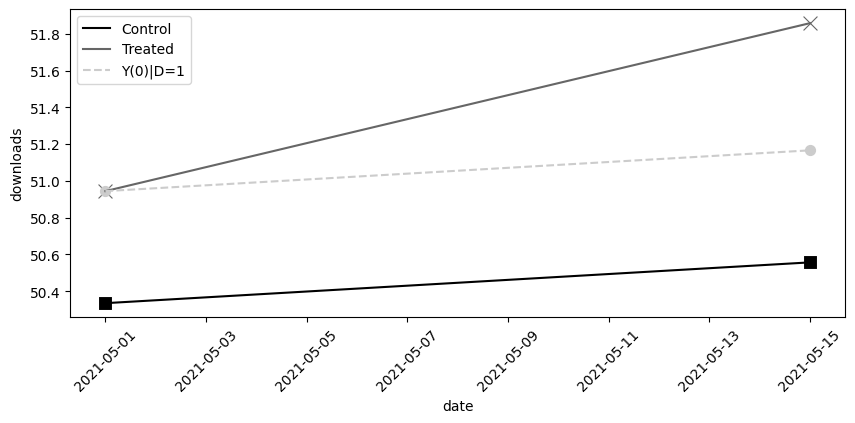

In [22]:
did_plt = did_data.reset_index()


plt.figure(figsize=(10,4))

sns.scatterplot(data=did_plt.query("treated==0"), x="date", y="downloads", s=100, color="C0", marker="s")
sns.lineplot(data=did_plt.query("treated==0"), x="date", y="downloads", label="Control", color="C0")

sns.scatterplot(data=did_plt.query("treated==1"), x="date", y="downloads", s=100, color="C1", marker="x")
sns.lineplot(data=did_plt.query("treated==1"), x="date", y="downloads", label="Treated", color="C1",)

plt.plot(did_data.loc[1, "date"], [did_data.loc[1, "downloads"][0], y0_est], color="C2", linestyle="dashed", label="Y(0)|D=1")
plt.scatter(did_data.loc[1, "date"], [did_data.loc[1, "downloads"][0], y0_est], color="C2", s=50)

plt.xticks(rotation = 45)
plt.legend()


### 선형회귀를 이용한 이중차분법(Regression DID)

#### 개입 전/후 기간을 하나의 블록으로 집계한 데이터

In [23]:
did_data = (mkt_data
            .groupby(["city", "post"])
            .agg({"downloads":"mean", "date": "min", "treated": "max"})
            .reset_index())

did_data.head()

,city,post,downloads,date,treated
0,5,0,50.642857,2021-05-01,0
1,5,1,50.166667,2021-05-15,0
2,15,0,49.142857,2021-05-01,0
3,15,1,49.166667,2021-05-15,0
4,20,0,48.785714,2021-05-01,0


 `statsmodels`와 `pyfixest`

DID 분석을 회귀 모형으로 구현할 때,
- **statsmodels (smf)** 은 파이썬에서 가장 널리 쓰이는 범용 회귀 패키지라 기본 구현을 설명하기에 적합합니다.  
- 그러나 DID는 본질적으로 **패널 데이터 + 고정효과(FE) + 클러스터 표준오차**가 중요합니다.  
  이를 편리하게 지원하는 패키지가 바로 **pyfixest**입니다.

따라서 
- statsmodels로는 DID의 기본 원리를 쉽게 보여줄 수 있고,  
- pyfixest로는 실제 실증연구에서 사용하는 **FE-DID, TWFE, robust SE**를 더 직관적으로 구현할 수 있습니다.

In [24]:
import statsmodels.formula.api as smf

smf.ols(
    'downloads ~ treated*post', data=did_data
).fit().params["treated:post"]

np.float64(0.6917359536407082)

In [25]:
import pyfixest as pf

model = pf.feols("downloads ~ treated*post", data=did_data)

# DID 추정치 (treated:post 계수)
coef = model.coef()["treated:post"]
print("DID estimate:", coef)

DID estimate: 0.6917359536407451


### 블록디자인을 바탕으로 한 이중차분법
- DID를 추정할때 처치 전후로 각 값들을 그룹화하여 하지 않고 각 시점의 데이터를 모두 활용하는 방법과
- 사전 평행 추세를 검정할 수 있다는 장점이 있습니다.


/var/folders/qj/p1t8n_615hx2wgwh8350jg6h0000gn/T/ipykernel_21522/2621860921.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .assign(treated=lambda d: d.groupby("city")["treated"].transform(max))
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropri

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 [Text(0.5, 0, '2021-05-01'),
  Text(1.5, 0, '2021-05-02'),
  Text(2.5, 0, '2021-05-03'),
  Text(3.5, 0, '2021-05-04'),
  Text(4.5, 0, '2021-05-05'),
  Text(5.5, 0, '2021-05-06'),
  Text(6.5, 0, '2021-05-07'),
  Text(7.5, 0, '2021-05-08'),
  Text(8.5, 0, '2021-05-09'),
  Text(9.5, 0, '2021-05-10'),
  Text(10.5, 0, '2021-05-11'),
  Text(11.5, 0, '2021-05-12'),
  Text(12.5, 0, '2021-05-13'),
  Text(13.5, 0, '2021-05-14'),
  Text(14.5, 0, '2021-05-15'),
  Text(15.5, 0, '2021-05-16'),
  Text(16.5, 0, '2021-05-17'),
  Text(17.5, 0, '2021-05-18'),
  Text(18.5, 0, '2021-05-19'),
  Text(19.5, 0, '2021-05-20'),
  Text(20.5, 0, '2021-05-21'),
  Text(21.5, 0, '2021-05-22'),
  Text(22.5, 0, '2021-05-23'),
  Text(23.5, 0, '2021-05-24'),
  Text(24.5, 0, '2021-05-25'),
  Text(25.5, 0, '

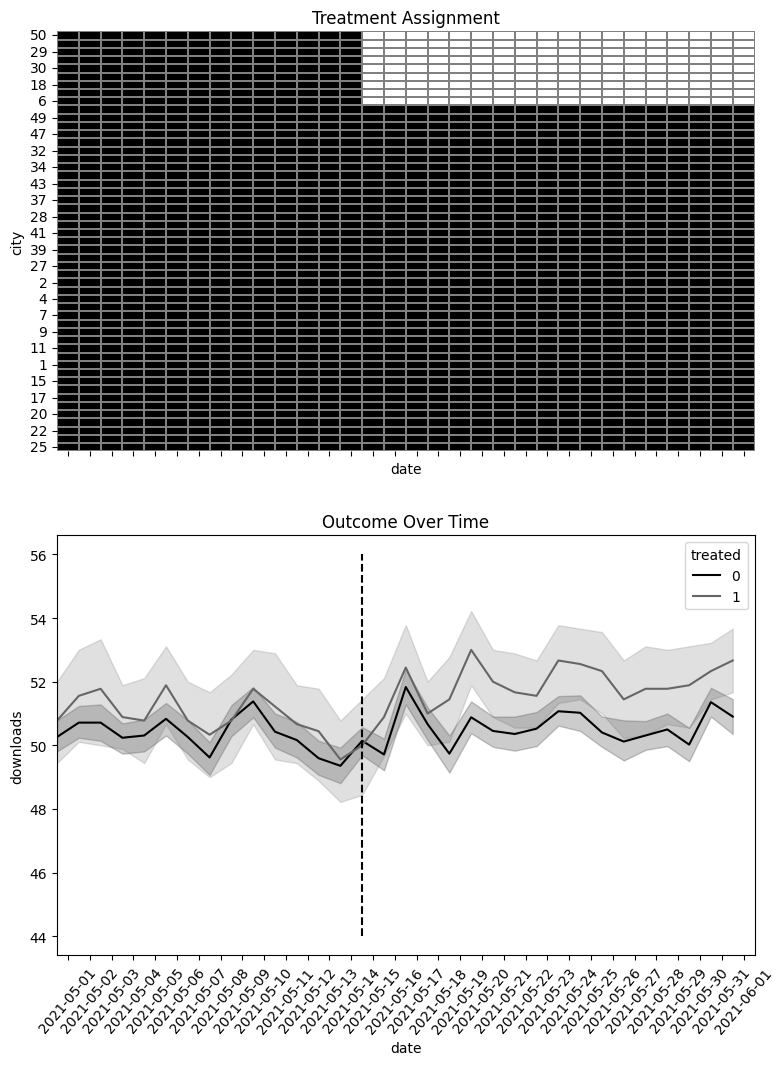

In [26]:
import matplotlib.ticker as plticker


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9, 12), sharex=True)

heat_plt = (mkt_data
            .assign(treated=lambda d: d.groupby("city")["treated"].transform(max))            
            .astype({"date":"str"})
            .assign(treated=mkt_data["treated"]*mkt_data["post"])
            .pivot(index="city", columns="date", values="treated")
            .reset_index()
            .sort_values(max(mkt_data["date"].astype(str)), ascending=False)
            .reset_index()
            .drop(columns=["city"])
            .rename(columns={"index":"city"})
            .set_index("city"))


sns.heatmap(heat_plt, cmap="gray", linewidths=0.01, linecolor="0.5", ax=ax1, cbar=False)

ax1.set_title("Treatment Assignment")


sns.lineplot(data=mkt_data.astype({"date":"str"}),
             x="date", y="downloads", hue="treated", ax=ax2)

loc = plticker.MultipleLocator(base=2.0)
# ax2.xaxis.set_major_locator(loc)
ax2.vlines("2021-05-15", mkt_data["downloads"].min(), mkt_data["downloads"].max(), color="black", ls="dashed", label="Interv.")
ax2.set_title("Outcome Over Time")

plt.xticks(rotation = 50)

In [92]:
mkt_data

,date,city,region,treated,tau,downloads,post
0,2021-05-01,5,S,0,0.000000,51.0,0
1,2021-05-02,5,S,0,0.000000,51.0,0
2,2021-05-03,5,S,0,0.000000,51.0,0
3,2021-05-04,5,S,0,0.000000,50.0,0
4,2021-05-05,5,S,0,0.000000,49.0,0
...,...,...,...,...,...,...,...
1627,2021-05-28,197,S,1,1.771233,53.0,1
1628,2021-05-29,197,S,1,1.771233,52.0,1
1629,2021-05-30,197,S,1,1.771233,54.0,1
1630,2021-05-31,197,S,1,1.771233,53.0,1


### Basic DID

In [27]:
m = smf.ols('downloads ~ treated*post', data=mkt_data).fit()

m.params["treated:post"]

np.float64(0.6917359536406855)

In [28]:
import pyfixest as pf

model = pf.feols("downloads ~ treated*post", data=mkt_data)

# DID 추정치 (treated:post 계수)
coef = model.coef()["treated:post"]
print("DID estimate:", coef)

DID estimate: 0.6917359536407436


#### 추론

In [41]:
m = smf.ols(
    'downloads ~ treated*post', data=did_data
).fit(cov_type='cluster', cov_kwds={'groups': did_data['city']})

print("ATT:", m.params["treated:post"])
m.conf_int().loc["treated:post"]

ATT: 0.6917359536407082


0    0.300318
1    1.083154
Name: treated:post, dtype: float64

In [43]:
import pyfixest as pf

m = pf.feols(
    "downloads ~ treated*post",
    vcov={"CRV1": "city"},   # 클러스터 표준오차: city 단위
    data=did_data
)

print("ATT:", m.coef()["treated:post"])
print(m.confint().loc["treated:post"])

ATT: 0.6917359536407451
2.5%     0.290613
97.5%    1.092859
Name: treated:post, dtype: float64


### 2WFE did 

In [33]:
m = smf.ols('downloads ~ treated:post + C(city) + C(date)',
            data=mkt_data).fit()

coef=m.params["treated:post"]

print("DID estimate:", coef)

DID estimate: 0.6917359536407248


In [32]:
import pyfixest as pf

# pyfixest의 feols 함수 사용
m = pf.feols("downloads ~ treated:post | city + date", data=mkt_data)

# 계수 확인
coef=m.coef()["treated:post"]
print("DID estimate:", coef)

DID estimate: 0.6917359536407154


#### 추론

##### 1. 실험 대상과 처치 전후 기간별 집계한 데이터 기반 추론

기존 표준 오차 기반

In [38]:
m = smf.ols('downloads ~ treated:post + C(city) + C(date)',
            data=did_data).fit()

print("ATT:", m.params["treated:post"])
m.conf_int().loc["treated:post"]

ATT: 0.6917359536407064


0    0.409916
1    0.973556
Name: treated:post, dtype: float64

군집 표준 오차 기반

In [39]:
m = smf.ols(
    'downloads ~ treated:post + C(city) + C(date)', data=did_data
).fit(cov_type='cluster', cov_kwds={'groups': did_data['city']})

print("ATT:", m.params["treated:post"])
m.conf_int().loc["treated:post"]

ATT: 0.6917359536407064


0    0.138188
1    1.245284
Name: treated:post, dtype: float64

In [44]:
import pyfixest as pf

m = pf.feols(
    "downloads ~ treated:post + C(city) + C(date)",
    vcov={"CRV1": "city"},   # 클러스터 표준오차: city 단위
    data=did_data
)

print("ATT:", m.coef()["treated:post"])
print(m.confint().loc["treated:post"])

ATT: 0.6917359536406991
2.5%     0.124463
97.5%    1.259009
Name: treated:post, dtype: float64


##### 2. 일별로 집계한 데이터

기존 표준오차 기반

In [40]:
m = smf.ols('downloads ~ treated:post + C(city) + C(date)',
            data=mkt_data).fit()

print("ATT:", m.params["treated:post"])
m.conf_int().loc["treated:post"]

ATT: 0.6917359536407248


0    0.478014
1    0.905457
Name: treated:post, dtype: float64

군집 표준 오차 기반

In [36]:
m = smf.ols(
    'downloads ~ treated:post + C(city) + C(date)', data=mkt_data
).fit(cov_type='cluster', cov_kwds={'groups': mkt_data['city']})

print("ATT:", m.params["treated:post"])
m.conf_int().loc["treated:post"]

ATT: 0.6917359536407248


0    0.296101
1    1.087370
Name: treated:post, dtype: float64

In [45]:
import pyfixest as pf

m = pf.feols(
    "downloads ~ treated:post + C(city) + C(date)",
    vcov={"CRV1": "city"},   # 클러스터 표준오차: city 단위
    data=mkt_data
)

print("ATT:", m.coef()["treated:post"])
print(m.confint().loc["treated:post"])

ATT: 0.6917359536407385
2.5%     0.286292
97.5%    1.097180
Name: treated:post, dtype: float64


### DID with covariates

In [ ]:
mkt_data_all = (pd.read_csv("../data/matheus_data/short_offline_mkt_all_regions.csv")
                .astype({"date":"datetime64[ns]"}))

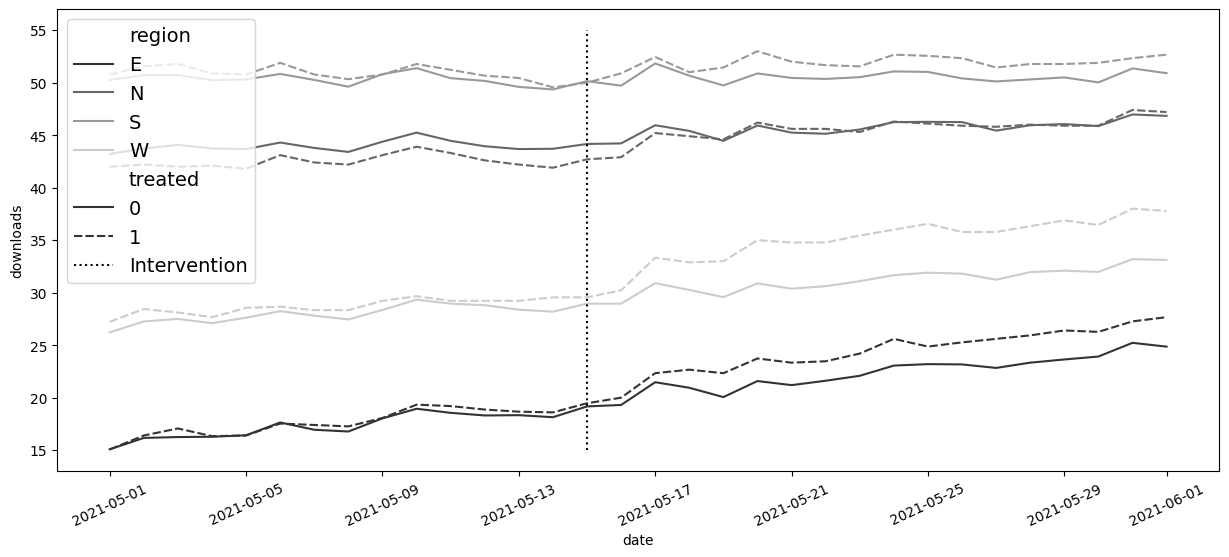

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=mkt_data_all.groupby(["date", "region", "treated"])[["downloads"]].mean().reset_index(),
             x="date", y="downloads", hue="region", style="treated", palette="gray")

plt.vlines(pd.to_datetime("2021-05-15"), 15, 55, ls="dotted", label="Intervention")
plt.legend(fontsize=14)

plt.xticks(rotation=25)

처치 이전 추세의 경우 지역내에서는 평행하지만 지역 간에는 평행하지 않은 것으로 보입니다. 이러한 상황해서 단순히 이원고정효과모델을 적용하면 ATT에 대해 편향된 추정값을 얻게되죠.   

따라서 이 문제를 해결하기 위해선 각 지역별로 서로 다른 추세가 있다는 것을 반드시 고려해야합니다.  

그럼 어떻게 지역별로 서로 다른 추세가 있다는 것을 모델에 반영할 수 있을까요? 바로 모델에 처치전의 공변량(covariates)을 포함하는 것입니다. 

공변량을 모델에 반영하여 ATT추정하는 방법은 대표적으로 2가지 방법이 있습니다.   


1. 각 지역별로 별도의 DID 회귀 모델 적용하고 ATT 가중평균하여 구하기

2. 지역 변수와 처치 후 더미 변수와 상호작용하기


In [66]:
print("True ATT: ", mkt_data_all.query("treated*post==1")["tau"].mean())

True ATT:  1.7208921056102682


##### 1. 각 지역별로 별도의 DID 회귀 모델 적용하고 ATT 가중평균($\hat\theta=\sum_r w_r \widehat{ATT}_r$)하여 구하기

In [48]:
m_saturated = smf.ols('downloads ~ (post*treated)*C(region)',
                      data=mkt_data_all).fit()

atts = m_saturated.params[m_saturated.params.index.str.contains("post:treated")]
atts

post:treated                   1.676808
post:treated:C(region)[T.N]   -0.343667
post:treated:C(region)[T.S]   -0.985072
post:treated:C(region)[T.W]    1.369363
dtype: float64

##### 추정

In [ ]:

import statsmodels.api as sm
from scipy.stats import norm

# (1) region size (가중치 계산)
reg_size = (mkt_data_all.groupby("region").size()
            / len(mkt_data_all["date"].unique()))

# (2) saturated DID 결과 계수
atts = m_saturated.params[m_saturated.params.index.str.contains("post:treated")]
cov = m_saturated.cov_params()  # 분산-공분산 행렬

# (3) base (= region baseline ATT, 보통 첫 지역)
base = atts.iloc[0]

# (4) 선형 조합 벡터 만들기
weights = [reg_size.iloc[0]] + list(reg_size.iloc[1:])
coefs = [base] + list(atts.iloc[1:] + base)

theta = np.dot(weights, coefs) / reg_size.sum()

# (5) 대응되는 선형 조합 벡터 정의 (계수 개수만큼)
# 인덱스 맞추기
att_idx = atts.index
w = np.zeros(len(m_saturated.params))

# baseline
w[m_saturated.params.index.get_loc(att_idx[0])] = reg_size.iloc[0]

# 나머지 region 효과들
for att_name, size in zip(att_idx[1:], reg_size.iloc[1:]):
    w[m_saturated.params.index.get_loc(att_idx[0])] += size   # baseline part
    w[m_saturated.params.index.get_loc(att_name)] += size     # interaction part

# normalize
w = w / reg_size.sum()

# (6) 분산 계산
theta_var = w @ cov @ w
theta_se = np.sqrt(theta_var)

# (7) 신뢰구간
alpha = 0.05
z = norm.ppf(1 - alpha/2)

ci_lower = theta - z * theta_se
ci_upper = theta + z * theta_se

print("Weighted ATT:", theta)
print("95% CI:", (ci_lower, ci_upper))

Weighted ATT: 1.6940400451471986
95% CI: (np.float64(1.3897593237876618), np.float64(1.9983207665067355))


##### 2. 지역변수와 처치 후 더미변수와 상호작용하기

In [71]:
m = smf.ols('downloads ~ post*(treated + C(region))',
            data=mkt_data_all).fit()

m.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.3522,0.101,172.218,0.000,17.155,17.550
C(region)[T.N],26.2770,0.137,191.739,0.000,26.008,26.546
C(region)[T.S],33.0815,0.135,245.772,0.000,32.818,33.345
C(region)[T.W],10.7118,0.135,79.581,0.000,10.448,10.976
post,4.9807,0.134,37.074,0.000,4.717,5.244
post:C(region)[T.N],-3.3458,0.183,-18.310,0.000,-3.704,-2.988
post:C(region)[T.S],-4.9334,0.179,-27.489,0.000,-5.285,-4.582
post:C(region)[T.W],-1.5408,0.179,-8.585,0.000,-1.893,-1.189
treated,0.0503,0.117,0.429,0.668,-0.179,0.280
post:treated,1.6811,0.156,10.758,0.000,1.375,1.987


post:treated에 대한 매개 변수를 ATT로 해석합니다. 

##### 추정

In [72]:
print("ATT:", m.params["post:treated"])
m.conf_int().loc["post:treated"]

ATT: 1.6810982546487103


0    1.374772
1    1.987424
Name: post:treated, dtype: float64

#### DML을 이용한 DID

In [74]:
!pip install doubleml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [doubleml]1/2 [doubleml]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [84]:
import warnings

# 모든 경고 무시
warnings.filterwarnings("ignore")

In [75]:

from doubleml import DoubleMLData, DoubleMLDID
from lightgbm import LGBMClassifier, LGBMRegressor

 Data 생성

In [ ]:
import numpy as np
import pandas as pd
from doubleml import DoubleMLData, DoubleMLDID
from lightgbm import LGBMRegressor, LGBMClassifier



def make_custom_did(n_obs=1000, n_time_periods=5, seed=None):
    if seed is not None:
        np.random.seed(seed)

    time_periods = (np.arange(2*n_time_periods) - n_time_periods)

    # fixed effects
    theta = np.zeros(shape=(n_obs, 2*n_time_periods)) + time_periods
    eta = np.random.normal(loc=0, scale=1, size=(n_obs,1))

    # covariates
    X = np.random.normal(loc=0, scale=1, size=(n_obs, 4, 2*n_time_periods))

    # treatment effects
    mu_means = np.concatenate((np.zeros(n_time_periods), np.arange(n_time_periods, 0, -1)))
    mu = np.random.normal(loc=0, scale=1, size=(n_obs, 2*n_time_periods)) + mu_means

    # treatment assignment
    f_ps = 0.75*(-X[:, 0, 0] + 0.5*X[:, 1, 0] - 0.25*X[:, 2, 0] 
                 - 0.1*X[:, 3, 0]*X[:, 2, 0] + np.cos(5*X[:, 1, 0]))
    ps = (np.exp(f_ps) / (1 + np.exp(f_ps))).reshape(-1,1)
    u = np.random.uniform(low=0, high=1, size=(n_obs,1))
    treatment = np.ones(shape=(n_obs, 2*n_time_periods)) * (ps >= u)

    # outcome
    g_X = (np.exp(X[:, 1, :]) - np.sin(5*X[:, 2, :]) + 2*X[:, 3, :])
    epsilon = np.random.normal(loc=0, scale=1, size=(n_obs, 2*n_time_periods))
    Y = theta + eta + treatment*mu + g_X + epsilon

    # reshape to long format
    Y_df = Y.reshape(-1)
    d_df = treatment.reshape(-1)
    t_df = np.tile(time_periods, n_obs)
    i_df = np.repeat(np.arange(n_obs), 2*n_time_periods)
    X_df = X.transpose(0,2,1).reshape(-1, 4)

    data = pd.DataFrame({
        'y': Y_df,
        'd': d_df,
        't': t_df,
        'i': i_df,
        'X0': X_df[:,0],
        'X1': X_df[:,1],
        'X2': X_df[:,2],
        'X3': X_df[:,3]
    })
    
    # True ATT = 사후 기간 효과 평균
    true_att = mu_means[n_time_periods:].mean()
    
    return data, true_att,mu_means

def did_to_dml_format(data):
    """
    make_custom_did()에서 생성된 long-format DataFrame -> DoubleMLDID용 데이터 변환
    """

    # 사전(pre, t<0), 사후(post, t>=0) 구분
    pre = data[data['t'] < 0]
    post = data[data['t'] >= 0]

    # (1) outcome: 개체별 (post 평균 - pre 평균)
    y_diff = post.groupby('i')['y'].mean().values - pre.groupby('i')['y'].mean().values

    # (2) treatment: 개체별 사후처치 여부 (post에서 하나만 뽑으면 됨)
    d = post.groupby('i')['d'].first().astype(int).values

    # (3) covariates: 개체별 pre-treatment covariates (t<0에서 첫 번째 시점 사용)
    x = pre.groupby('i')[['X0', 'X1', 'X2', 'X3']].first().values

    # DoubleMLData 입력용
    dml_data = DoubleMLData.from_arrays(x=x, y=y_diff, d=d)

    return dml_data



data, true_att,_ = make_custom_did(n_obs=1000, n_time_periods=5, seed=42)

dml_data = did_to_dml_format(data)

Learners 설정


In [ ]:

ml_g = LGBMRegressor(n_estimators=50, num_leaves=5, verbose=-1)
ml_m = LGBMClassifier(n_estimators=50, num_leaves=5, verbose=-1)


================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4']
Instrument variable(s): None
No. Observations: 1000

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 6 entries, X1 to d
dtypes: float64(6)
memory usage: 47.0 KB

ATT estimate: [3.05836115]
      2.5 %    97.5 %
d  2.768038  3.348684


DoubleMLDID 추정

In [ ]:

dml_did = DoubleMLDID(dml_data,
                      ml_g=ml_g,
                      ml_m=ml_m,
                      score='observational',
                      n_folds=5)
dml_did.fit()

print("ATT estimate:", dml_did.coef)
print(dml_did.confint(level=0.95))



ATT estimate: [3.1189311]
      2.5 %    97.5 %
d  2.822394  3.415468


Coverage 시뮬레이션

In [216]:


n_rep = 200
ATTE_estimates = np.full((n_rep), np.nan)
coverage = np.full((n_rep), np.nan)
ci_length = np.full((n_rep), np.nan)

for i_rep in range(n_rep):
    if (i_rep % int(n_rep/10)) == 0:
        print(f'Iteration: {i_rep}/{n_rep}')
    
    data, true_att,_ = make_custom_did(n_obs=1000, n_time_periods=5, seed=i_rep)

    dml_data = did_to_dml_format(data)
    
 
    dml_did = DoubleMLDID(dml_data, ml_g=ml_g, ml_m=ml_m, n_folds=5)
    dml_did.fit()

    ATTE_estimates[i_rep] = dml_did.coef.squeeze()
    confint = dml_did.confint(level=0.95)
    coverage[i_rep] = (confint['2.5 %'].iloc[0] <= true_att) & (true_att <= confint['97.5 %'].iloc[0])
    ci_length[i_rep] = confint['97.5 %'].iloc[0] - confint['2.5 %'].iloc[0]


    
print("results from coverage simulation:")
print(f'True ATT: {true_att}')
print(f'Estimated ATT: {np.mean(ATTE_estimates)}')
print(f'Coverage: {coverage.mean()}')
print(f'Average CI length: {ci_length.mean()}')

Iteration: 0/200
Iteration: 20/200
Iteration: 40/200
Iteration: 60/200
Iteration: 80/200
Iteration: 100/200
Iteration: 120/200
Iteration: 140/200
Iteration: 160/200
Iteration: 180/200
results from coverage simulation:
True ATT: 3.0
Estimated ATT: 2.991261797700492
Coverage: 0.91
Average CI length: 0.6293062710727478


In [215]:
print("results from coverage simulation:")
print(f'True ATT: {true_att}')
print(f'Estimated ATT: {np.mean(ATTE_estimates)}')
print(f'Coverage: {coverage.mean()}')
print(f'Average CI length: {ci_length.mean()}')

results from coverage simulation:
True ATT: 3.0
Estimated ATT: 2.991261797700492
Coverage: 0.91
Average CI length: 0.6293062710727478


본 시뮬레이션에서 설정된 진짜 ATT는 3.0이며, DoubleML-DID 추정량의 평균은 2.99로 거의 일치했습니다.

또한, 95% 신뢰구간의 coverage는 약 91%로 나타났습니다. 

이는 신뢰구간이 다소 좁아 실제 모수를 포함하는 비율이 목표치(95%)보다 약간 낮다는 것을 의미합니다.  

즉, 추정이 다소 과신(overconfident) 되는 경향이 있습니다.

그럼에도 불구하고, finite-sample 환경에서는 여전히 비교적 준수한 수준이며, 목표치인 95%에 근접한 결과입니다. 

따라서 DoubleML-DID 추정법은 반복 표본에서 신뢰할 만한 추정치와 적절한 불확실성 추정을 제공함을 확인할 수 있습니다.

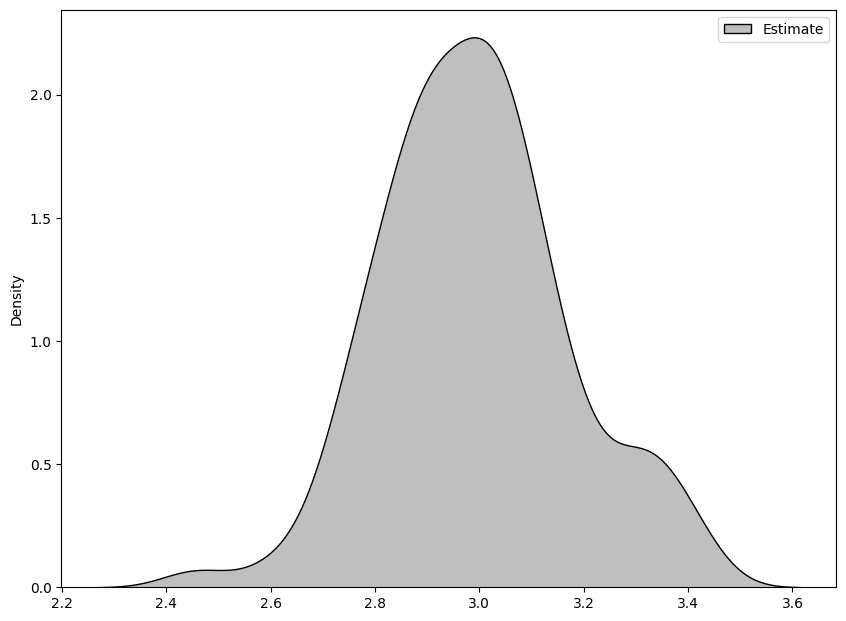

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pa = pd.DataFrame(ATTE_estimates, columns=['Estimate'])
g = sns.kdeplot(df_pa, fill=True)
plt.show()

본 시뮬레이션에서 얻어진 ATT 추정치의 분포는 대체로 정규분포 형태를 보이며, 참값(3.0)을 중심으로 집중되어 있습니다. 

이는 DoubleML-DID 추정량이 점근적으로 정규분포에 수렴한다는 이론적 특성과 부합하며, 반복 표본에서도 편향 없이 안정적인 추정을 제공함을 시각적으로 확인할 수 있습니다.

사전 추세 검정하기

In [173]:
n_estimators = 50
ml_g = LGBMRegressor(n_estimators=n_estimators, num_leaves=5, verbose=-1)
ml_m = LGBMClassifier(n_estimators=n_estimators, num_leaves=5, verbose=-1)

In [ ]:
n_time_periods=5
data, _,mu_means = make_custom_did(n_obs=1000, n_time_periods=5, seed=i_rep)
time_periods = (np.arange(2*n_time_periods) - n_time_periods)

df = pd.DataFrame(np.nan,
                  index=range(2*n_time_periods-1),
                  columns=['lower', 'effect', 'upper'])
df['time'] = time_periods[1:]
df["true effect"] = mu_means[1:]

np.random.seed(42)
for t_idx, t in enumerate(time_periods[1:]):
    if t <= 0:
        t_diff = t-1
    else:
        # compare to outcome before treatment
        t_diff = -1
    # outcome as the difference for each model
    
    y_diff = data[data['t'] == t]['y'].values - data[data['t'] == t_diff]['y'].values
    covariates = np.column_stack((data[data['t'] == t][[f'X{i}' for i in range(4)]].values, data[data['t'] == t_diff][[f'X{i}' for i in range(4)]].values))
    dml_data = DoubleMLData.from_arrays(x=covariates,
                                        y=y_diff,
                                        d=data[data['t'] == t]['d'].values)
    dml_did = DoubleMLDID(dml_data,
                          ml_g=ml_g,
                          ml_m=ml_m)
    dml_did.fit()

    df.at[t_idx, 'effect'] = dml_did.coef 
    confint = dml_did.confint(level=0.95)
    df.at[t_idx, 'lower'] = confint['2.5 %'].iloc[0]
    df.at[t_idx, 'upper'] = confint['97.5 %'].iloc[0]
    df["true effect"] = mu_means[1:]

In [208]:
df

,lower,effect,upper,time,true effect
0,-0.622488,-0.223705,0.175077,-4,0.0
1,-0.259171,0.085002,0.429174,-3,0.0
2,-0.566082,-0.204853,0.156376,-2,0.0
3,-0.397169,-0.035365,0.326439,-1,0.0
4,4.664547,5.010711,5.356875,0,5.0
5,3.564744,3.941238,4.317732,1,4.0
6,2.295386,2.791091,3.286796,2,3.0
7,1.757909,2.127233,2.496557,3,2.0
8,0.719589,1.049249,1.378908,4,1.0


결과 시각화

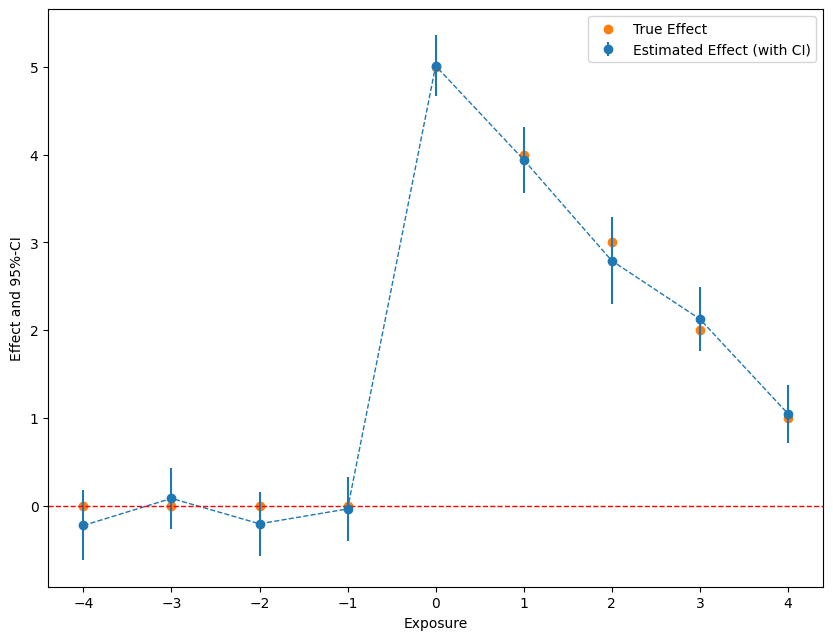

In [206]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10., 7.5
fig, ax = plt.subplots()

errors = np.full((2, 2*n_time_periods - 1), np.nan)
errors[0, :] = df['effect'] -   df['lower']
errors[1, :] = df['upper'] - df['effect']

plt.errorbar(df['time'], df['effect'], fmt='o', yerr=errors, color='#1F77B4',
             ecolor='#1F77B4', label='Estimated Effect (with CI)')
ax.plot(time_periods[1:], df['effect'], linestyle='--', color='#1F77B4', linewidth=1)

# add horizontal line
ax.axhline(y=0, color='r', linestyle='--', linewidth=1)

# add true effect
ax.scatter(x=df['time'], y=df['true effect'], c='#FF7F0E', label='True Effect')

plt.xlabel('Exposure')
plt.legend()
_ = plt.ylabel('Effect and 95%-CI')

- 사전 구간에서 모든 추정치의 CI가 0을 포함하므로, 평행추세 가정은 위배되지 않았다고 해석할 수 있습니다.

- 또, 사후 구간에서 True Effect를 잘 커버하고 있으므로 추정량이 일관되고 신뢰할 만하다고 말할 수 있습니다.